# 🏋️‍♂️ Model Fitness

A Model Fitness é uma das empresas de maior destaque no ramo de academias. Sua experiência personalizada ao cliente oferece, além da oportunidade de treinar com os melhores equipamentos do mercado, a possibilidade de aproveitar experiências exclusivas, com a oportunidade única de se sentir acomodado e confortável dentro do ambiente de uma academia.

Porém, a taxa de rotatividade de clientes é algo que ainda incomoda os donos do negócio. Por meio da análise do conjunto de dados do último mês, pretendemos observar o comportamento de clientes que estão passíveis a largar o serviço, de modo a prever quais características comuns esses clientes apresentam, a fim de evitar maior evasão para os meses seguintes.

Dentre os diversos dados presentes no conjunto, destacamos a informação sobre o Churn, que identifica a rotatividade de clientes em um determinado mês. Essa informação é importante para trabalharmos modelos de previsão, identificando relações entre características tais como idade, tempo de uso e formas de contratação do serviço à taxa de saída de clientes.

---

## Importando e observando os dados

Começamos a análise por meio da importação e observação de dados. Identificamos a quantidade de dados a serem trabalhados e a possível necessidade de tratamento e pré-processamento dos dados antes do estudo.

In [1]:
# Importa as bibliotecas iniciais.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importa os dados.
df = pd.read_csv('./datasets/gym_churn_us.csv')

In [3]:
# Exibe a quantidade de linhas e colunas da tabela.
df.shape

(4000, 14)

O conjunto de dados apresenta 14 (catorze) colunas, referentes às informações de cada usuário. No total temos 4.000 clientes, cujos comportamentos serão estudados com base em 13 (treze) características, a fim de determinar a variável objetivo do estudo, que, no caso em tela, se trata da taxa de rotatividade de clientes sobre o serviço disponibilizado pela academia.

In [4]:
# Exibe informações sobre o dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

De início logo podemos observar que não existem valores ausentes no dataframe. Dessa forma, não há necessidade de trabalhar esse tipo de valores, que poderiam vir a ter influência sobre os resultados finais do nosso modelo de previsão. Além disso, os tipos de dados estão adequados para o prosseguimento do trabalho.

Porém, observamos que não existe padronização nos nomes das colunas, dentre as quais podemos visualizar letras maiúsculas e minúsuculas misturadas. Sendo assim, iremos tratar apenas os seus nomes, para que não ocorra confusão de acesso aos dados futuramente.

In [5]:
# Padroniza os nomes das colunas.
df.columns = df.columns.str.lower()

In [6]:
# Observa a descrição matemática dos dados.
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Observamos diversas características categóricas no dataframe: Gender, Near Location, Partner, Promo Friends, Phone, Group Visits e o próprio Churn, compostas por valores 0 ou 1. Apesar de, em termos de economia de memória e organização, o tipo category ser mais eficiente para representar esses dados, iremos mantê-los no formato int para trabalhar os modelos de machine learning.

In [7]:
# Exibe a disposição geral dos 5 primeiros registros.
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


---

## Consulta de correlação das características

Algumas características podem estar correlacionadas e influenciar sobre os valores atribuídos a outras. Nesse momento, iremos observar o grau de relação entre características distintas do modelo apresentado e determinar o seu peso sobre a observação dos dados.

In [8]:
# Define a matriz de correlação dos dados do dataframe.
cm = df.corr()

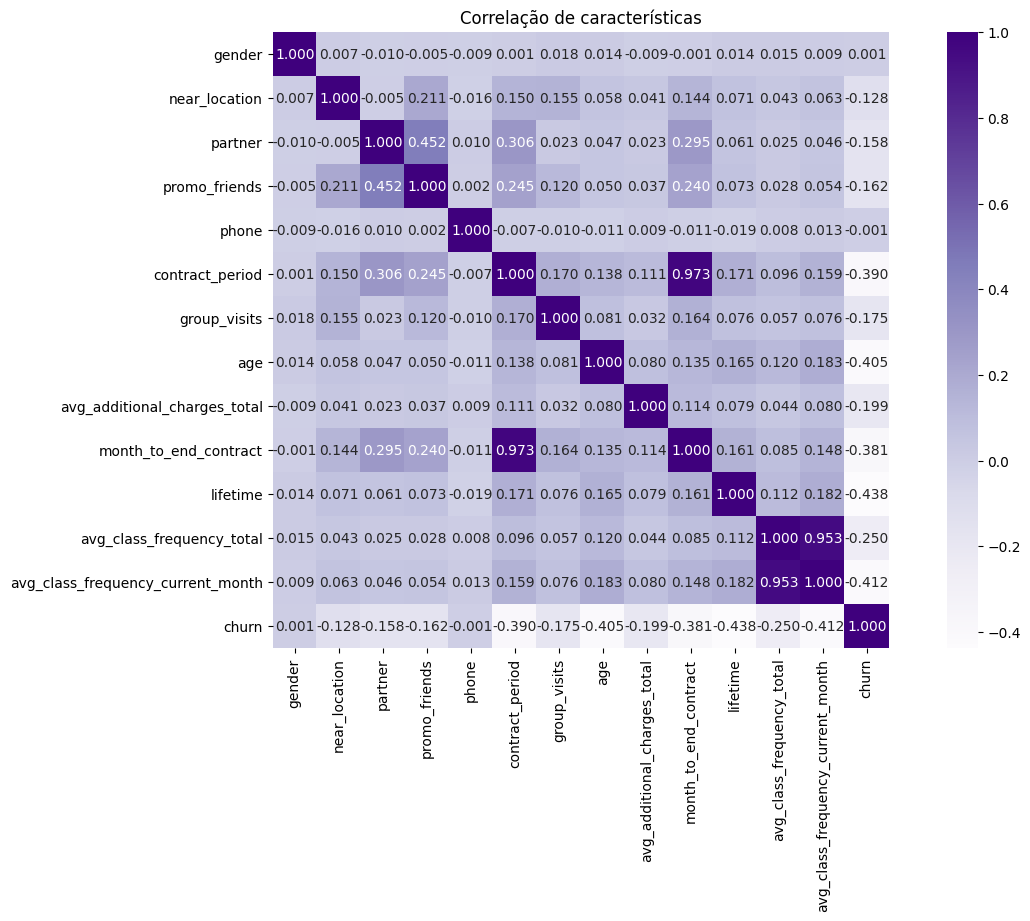

In [9]:
# Plota a matriz de correlação em um heatmap, com os dados exibidos em 3 casas decimais.
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, fmt='.3f', square=True, cmap='Purples')
plt.title('Correlação de características')
plt.show()

Podemos notar algumas correlações esperadas no mapa de calor exibido acima. A primeira delas é a correlação entre o período total de contrato e a quantidade de meses para o final dele. A segunda é a correlação entre a média de frequência semanal total e a média de frequência semanal no mês atual.

Apesar dessas duas fortes correlações, identificamos que o dataframe não apresenta dependência entre características isoladas, visto que, por ser tratarem de dados vinculados, a dependência entre essas características seria naturalmente evidente.

In [10]:
# Transposição da tabela de churn para visualização dos dados.
df.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Em uma primeira análise dos números médios das características, logo podemos identificar alguns comportamentos em relação aos usuários que deixaram ou não o serviço. Alguns destaques estão nas questões de proximidade da academia, de indicações ou ofertas, período de contrato, idade e tempo desde a primeira visita. Esses números podem determinar algumas tendências sobre a taxa de rotatividade de usuários que serão analisadas mais adiante.

## Visualização gráfica da rotatividade por característica

Para prosseguir com a análise, iremos observar a visualização gráfica dessas características em particular e sua relação com a coluna de Churn.

/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


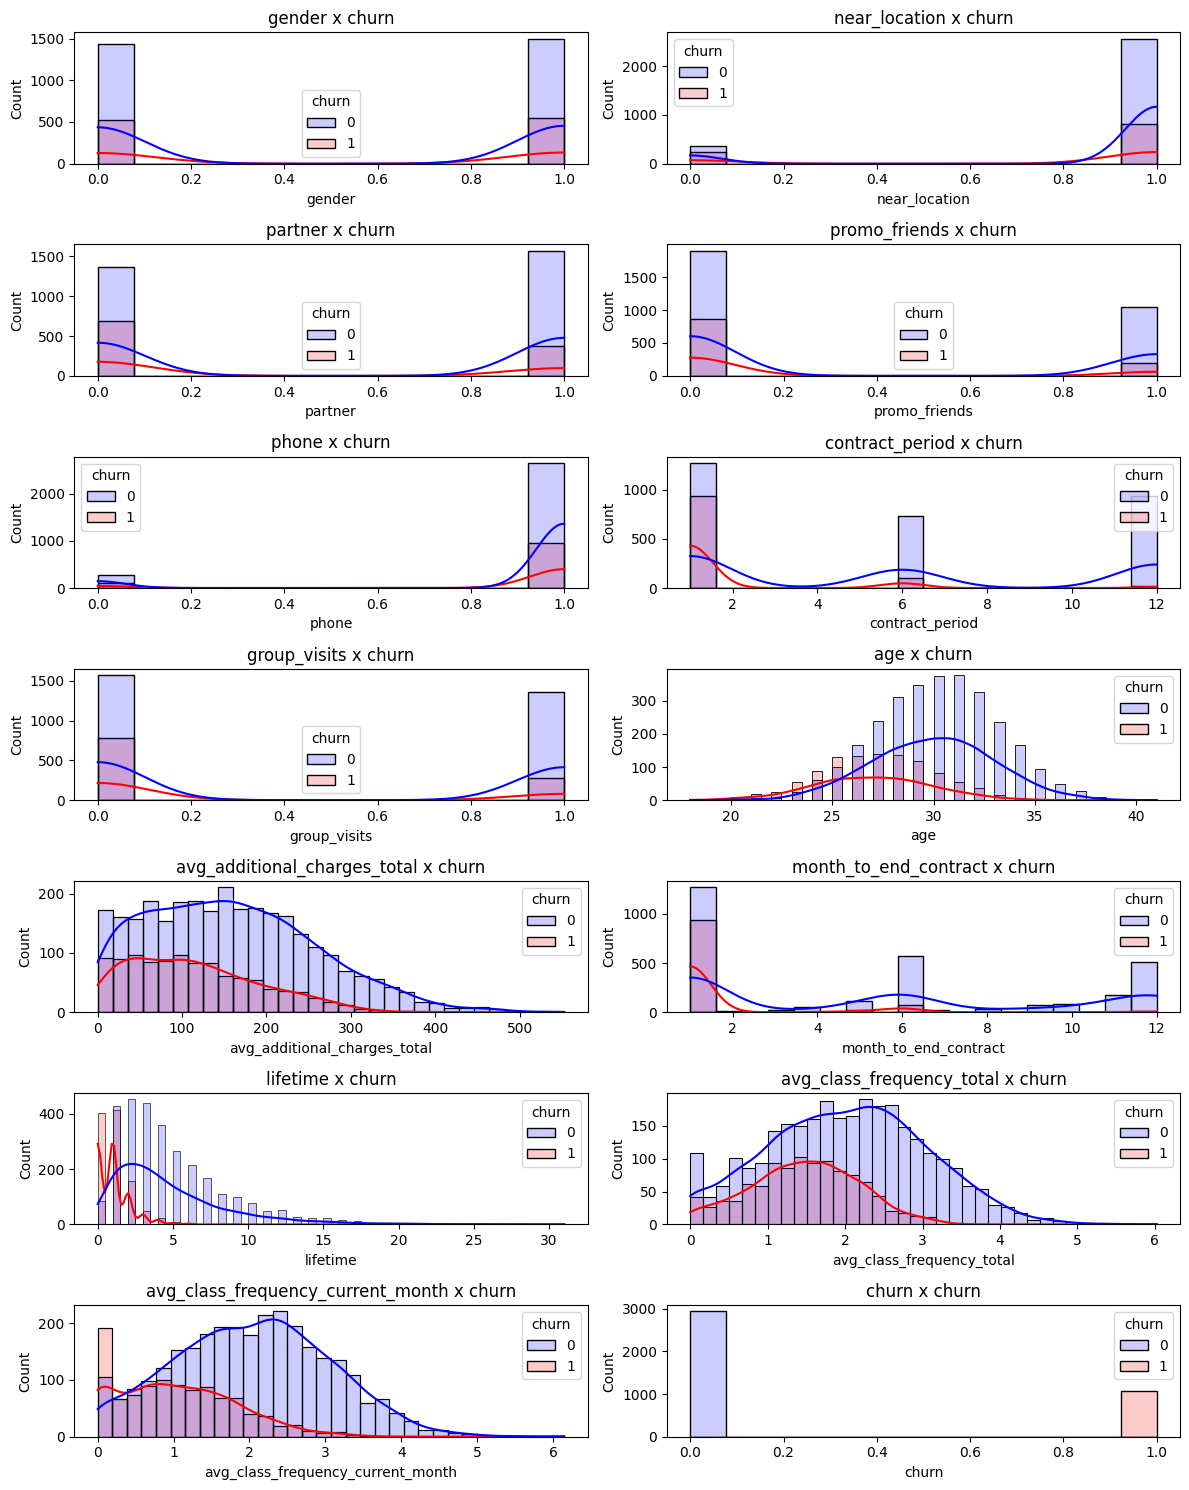

In [11]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12,15)) # Formata a exibição dos gráficos em 7x2 (7 linhas por 2 colunas).

# O código acima gera uma matriz de eixos 7x2. Para iterarmos em zip, transformamos a matriz para uma lista (ou vetor).
axes = axes.flatten()

for ax, col in zip(axes, df.columns): # Na iteração, cada eixo recebe uma coluna do dataframe para plotar.
    sns.histplot(data=df, x=col, hue='churn', kde=True, ax=ax, alpha=0.2, palette=['blue','red'])
    ax.set_title(f'{col} x churn')
plt.tight_layout()
plt.show()

Analisando os gráficos acima, notamos que pessoas que moram próximas à academia são definitivamente menos propensas a largar o serviço. A questão da proximidade é um característica relevante para a taxa de rotatividade de clientes.

Em seguida, podemos destacar que clientes que registraram seu número de telefone também estão menos propensos a deixar à academia. Já clientes que não se inscreveram por indicação de amigos apresentam maior taxa de rotatividade.

Sobre a questão da idade, a maior taxa de rotatividade se faz presente em clientes mais jovens, até os 25 anos. Por outro lado, clientes na faixa dos 30 anos são mais fiéis aos planos da academia. Além disso, os clientes que fizeram maior consumo dos serviços extras disponibilizados também se mantiveram fiéis no período estudado.

Em relação à frequência, é possível notar que os clientes que abandonaram a academia tendem a ter maior aderência no início, e a largar o serviço com o decorrer do tempo. Esses clientes costumam sair da academia após o primeiro mês. Também são clientes que apresentam contratos mais curtos e que não frequentam tantas atividades em grupo.

---

## Testagem de modelos de previsão

Com o intuito de observar a interpretabilidade dos nossos dados, vamos agora trabalhar modelos de machine learning com o fim de consultar e prever o comportamento dos clientes por meio das características apresentadas pelo conjunto de dados disponibilizado.

In [12]:
# Importa as bibliotecas de padronização e treinamento dos dados.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
# X são as informações de características. Y é a coluna da variável objetivo (churn).
X = df.drop('churn', axis=1)
y = df['churn']

In [14]:
# Treinamento dos dados. Random state no valor 0 assegura que teremos sempre o mesmo parâmetro de treinamento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Padroniza cada característica (coluna) para a mesma escala: 0 de média e 1 de desvio-padrão.
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

In [16]:
# Escalonamento dos dados de validação.
X_test_st = scaler.transform(X_test)

Nesse primeiro momento, realizamos a separação das colunas de características, atribuídas à variavel X, da variável objetivo (a coluna churn), atribuída a Y. Após esse procedimento, separamos as amostras de treinamento (80% do total) e de validação (20% das amostras). Fixamos o valor de *random_state* em 0 para que não haja alteração na seleção das amostras após novas execuções do código.

Em seguida, utilizamos o método *StandardScaler( )* para realizar a normalização e padronização dos dados, de modo que cada coluna (característica) tenha o valor de média definido em 0 e o valor de desvio-padrão definido em 1. Assim, garantimos que os valores não estejam espaçados antes de aplicá-los ao modelo de previsão.

In [17]:
# Importa as bibliotecas de modelos e métricas do teste.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [18]:
# Aplica o modelo de Regressão Logística aos dados escalonados.
model = LogisticRegression()

In [19]:
model.fit(X_train_st, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test_st)

In [21]:
# Aplica as métricas ao teste de Regressão Logística.
print('->', model)
print('Acurácia: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precisão: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Sensibilidade: {:.2f}'.format(recall_score(y_test, y_pred)))

-> LogisticRegression()
Acurácia: 0.92
Precisão: 0.85
Sensibilidade: 0.83


In [22]:
# Aplica o modelo de Floresta Aleatória aos dados escalonados.
model = RandomForestClassifier(random_state=0)

In [23]:
model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

In [24]:
y_pred = model.predict(X_test_st)

In [25]:
# Aplica as métricas ao teste de Floresta Aleatória.
print('->', model)
print('Acurácia: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precisão: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Sensibilidade: {:.2f}'.format(recall_score(y_test, y_pred)))

-> RandomForestClassifier(random_state=0)
Acurácia: 0.92
Precisão: 0.84
Sensibilidade: 0.81


Por meio da aplicação das métricas de acurácia, precisão e sensibilidade (recall), verificamos que o modelo de Regressão Logística apresentou melhores resultados que o de Floresta Aleatória nos dois últimos quesitos, mesmo que os resultados dos dois modelos estejam equiparados. Essas métricas são aplicadas para testar a capacidade de previsão dos modelos, a fim de utilizá-los para prever a taxa de rotatividade de clientes nos próximos meses.

## Testagem por agrupamento

Observamos por meio da métrica de acurácia que os dados sobre nossos clientes estão balanceados. Agora aplicaremos o modelo de agrupamento K-Means para verificar a previsão de grupos e aprofundar o estudo de influência das características do modelo sobre a variável objetivo (taxa de rotatividade).

In [26]:
# Importa a biblioteca de agrupamento hierárquico.
from scipy.cluster.hierarchy import dendrogram, linkage

In [27]:
# Aplica o clustering aos dados escalonados.
linked = linkage(X_train_st, method='ward')

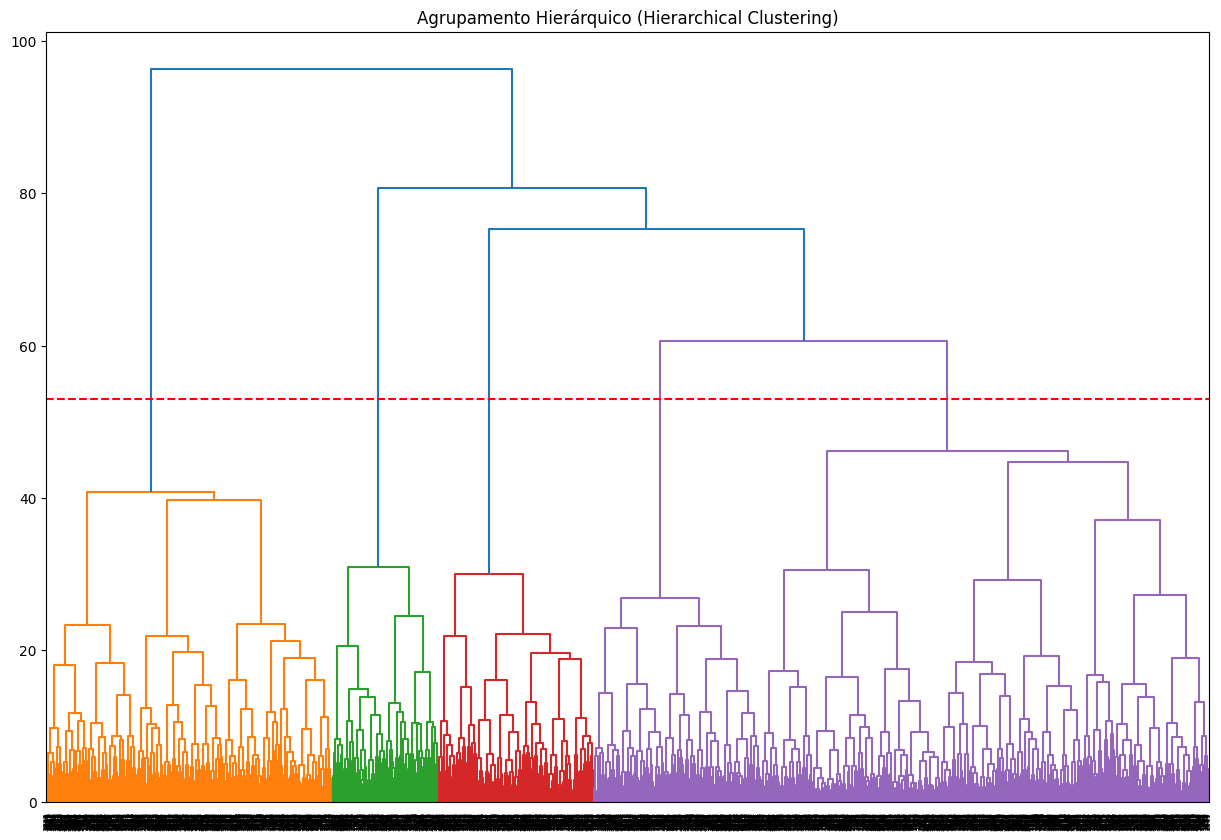

In [28]:
# Plota o dendrograma do agrupamento hierárquico.
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.axhline(y=53, color='r', linestyle='--') # Cria uma linha de identificação para o corte do número de grupos.
plt.title('Agrupamento Hierárquico (Hierarchical Clustering)')
plt.show()

Os grupos de um dendrograma, como visualizado na imagem acima, são separados por ramos. Dessa forma, cada ramo identifica um grupo de características semelhantes, que são identificadas e separadas até o modelo sugerir a quantidade ideal de grupos semelhantes (ou clusters).

A aplicação de quatro cores ao final do dendograma sugere que o modelo identificou 4 grupos distintos *(k = 4)* dentro da nossa amostra de clientes, por conta da proximidade de características dos grupos. Porém, para prosseguirmos com a análise das características, iremos separá-los em 5 grupos distintos *(k = 5)* de clientes, com o intuito de filtrar melhor as informações finais.

In [29]:
# Importa a biblioteca de clustering.
from sklearn.cluster import KMeans

In [30]:
# Define a coluna de identificação de cada cliente por um dos 5 grupos, com base em suas características.
df['cluster'] = KMeans(n_clusters=5).fit_predict(X)

In [31]:
# Calcula a média de características por grupo (cluster).
df.groupby('cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.514091,0.839650,0.451895,0.279883,0.897959,4.301263,0.407191,28.973761,105.932804,3.996113,3.544218,1.852564,1.708264,0.334305
1,0.511435,0.844075,0.495842,0.320166,0.902287,4.755717,0.423077,29.401247,174.873445,4.376299,3.749480,1.895200,1.785569,0.226611
2,0.468635,0.856089,0.516605,0.332103,0.926199,5.822878,0.431734,29.845018,356.481960,5.383764,4.420664,2.019260,2.009382,0.044280
3,0.508721,0.824612,0.488372,0.293605,0.907946,4.198643,0.387597,28.908915,35.600722,3.855620,3.394380,1.836755,1.692641,0.349806
4,0.521246,0.881020,0.511331,0.347025,0.898017,5.400850,0.433428,29.344193,250.984767,5.001416,4.169972,1.903480,1.843255,0.178470


In [32]:
# Exibe os grupos que apresentaram a maior taxa para cada característica do conjunto de dados.
df.groupby('cluster').mean().idxmax()

gender                               4
near_location                        4
partner                              2
promo_friends                        4
phone                                2
contract_period                      2
group_visits                         4
age                                  2
avg_additional_charges_total         2
month_to_end_contract                2
lifetime                             2
avg_class_frequency_total            2
avg_class_frequency_current_month    2
churn                                3
dtype: int64

In [33]:
# Exibe o total de clientes que deixaram o serviço por grupo.
df.groupby('cluster')['churn'].sum()

cluster
0    344
1    218
2     12
3    361
4    126
Name: churn, dtype: int64

O grupo 1 apresentou o menor número de clientes que saíram da academia no período. Além disso, esse grupo se destaca por apresentar a maior taxa de clientes que frequentam as atividades da academia, que são funcionários de empresas parceiras e com contratos mais longos. Ademais, são clientes que passaram seu número de telefone ao cadastrar. Consequentemente, o grupo 1 é o que mais consume os demais serviços da academia, como café, artigos esportivos, massagens etc.

Já o grupo 2, o segundo com menor evasão, é constituído por clientes que se inscreveram por indicação de amigos, que frequentam mais atividades em grupo e que moram nas proximidades da academia. Podemos identificar esse como sendo o grupo de pessoas que frequentam a academia para atividades coletivas.

In [34]:
# Calcula a taxa de rotatividade por grupo.
df.groupby('cluster')['churn'].mean()

cluster
0    0.334305
1    0.226611
2    0.044280
3    0.349806
4    0.178470
Name: churn, dtype: float64

In [35]:
# Exibe os grupos que apresentaram a menor taxa para cada característica do conjunto de dados.
df.groupby('cluster').mean().idxmin()

gender                               2
near_location                        3
partner                              0
promo_friends                        0
phone                                0
contract_period                      3
group_visits                         3
age                                  3
avg_additional_charges_total         3
month_to_end_contract                3
lifetime                             3
avg_class_frequency_total            3
avg_class_frequency_current_month    3
churn                                2
dtype: int64

Identificamos que os grupos 0 e 3 apresentaram as maiores taxas de rotatividade, indicando que são esses os grupos que tiveram maior entrada e saída de clientes no período em estudo. Vamos debruçar sobre os números:

O grupo 0 teve 33,4% de rotatividade no período. Esse foi o grupo que apresentou menor quantidade de clientes que são funcionários de companhias parceiras ou que foram indicados por amigos no ato da matrícula.

Já o grupo 3 teve a maior rotatividade dentre os grupos do estudo, algo próximo aos 35% de rotatividade. Esse grupo é formado por clientes mais jovens e que moram mais distantes da academia. Além disso, o grupo é identificado por clientes com contratos mais curtos e que frequentaram menos a academia no último mês.

---

## Conclusão Geral

Por meio da análise dos números e gráficos apresentados, identificamos que a maior taxa de evasão de clientes se faz presente no grupo de usuários que moram mais distantes da academia. Dessa forma, sugerimos o estudo da possibilidade de abertura de novas redes, em locais próximos à moradia desses clientes ou centros de grande movimentação, a fim de aumentar a captação por meio da proximidade do serviço oferecido com o público-alvo. Evidentemente, tendo em vista o gasto com a abertura de novas franquias, cabe reforçar a necessidade de novo estudo a fim de identificar as melhores localidades para a abertura de novos estabelecimentos da rede.

Além disso, os números indicam que clientes mais jovens e com contratos mais curtos tendem a deixar o serviço após cerca de um mês de uso. Para esse grupo de clientes, sugerimos ao departamento responsável apresentar novas ofertas com o intuito de segurar os clientes por mais meses, unido ao incentivo de acesso às atividades em grupos que, conforme identificado no estudo, possuem maior capacidade de retenção dos usuários.

Por fim, cabe destacar o bom número de clientes que se mantiveram fiéis ao contrato e ao serviço oferecido, aproveitando da disponibilidade de serviços extras da academia e fortalecendo o uso de ofertas promocionais, como a oferecida a empresas parceiras, além da grande receptividade das sessões em grupo.